# Analisando Dados da Produção Hospitalar

In [1]:
# Para usar as bibliotecas pandas e matplotlib é necessário fazer a instalação usando pip install no terminal
# pip install pandas
# pip install matplotlib

In [2]:
# Para usar o pandas, basta importar a biblioteca para seu projeto
import pandas as pd

In [3]:
# Carregamento dos dados do arquivo CSV "sih_cnv_qiuf094147179_101_158_151 (ano-mes-processamento).csv" para o DataFrame 'dados'.
# O arquivo é lido considerando a codificação ISO-8859-1 para suportar caracteres especiais europeus.
# As três primeiras linhas e as últimas 12 linhas são ignoradas para excluir cabeçalhos longos e rodapés, respectivamente, que não são parte dos dados analíticos.
# O delimitador de campos no arquivo é definido como ponto e vírgula (;), e o motor de leitura 'python' é utilizado para permitir a opção 'skipfooter'.
dados = pd.read_csv("sih_cnv_qiuf094221179_101_158_151 (ano-mes-atendimento).csv", 
                    encoding="ISO-8859-1", 
                    skiprows=3, 
                    skipfooter=12, 
                    sep=";", 
                    engine='python',
                    thousands=".",
                    decimal=",")

In [4]:
# primeiras 5 linhas do DataFrame
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,12505974.83,12009682.89,11892438.13,12737928.88,12068445.93,10814659.45,7839878.93,4969181.30,2434117.87,1.394262e+09
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4861672.52,5282731.30,4830246.24,4925043.24,4329288.81,4071963.23,3233614.21,1394717.40,-,5.877784e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,22951007.22,22636889.89,22193955.78,21762872.97,16686364.04,17051515.93,14725982.12,11345788.28,4838198.31,2.613559e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,4915988.80,4097022.28,3814616.24,3180791.10,2362582.36,1585002.57,165184.76,91360.44,41945.05,4.511701e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,52730367.64,49576192.93,49819035.62,52500501.45,51714821.84,51237171.71,49646581.93,32989201.74,13610385.98,6.322688e+09


In [5]:
# últimas 5 linhas do DataFrame
dados.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,...,1.199118e+08,1.141806e+08,1.148215e+08,1.208417e+08,1.140196e+08,1.161876e+08,1.017237e+08,79016335.07,35097902.08,1.675015e+10
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,...,2.701212e+07,2.598033e+07,2.740884e+07,2.776104e+07,2.589779e+07,2.435644e+07,1.797520e+07,11104710.76,3622254.04,3.219624e+09
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,...,2.447079e+07,2.292929e+07,2.355093e+07,2.424369e+07,2.242473e+07,2.157215e+07,1.875799e+07,13608235.28,7711923.78,2.988457e+09
25,52 Goiás,-,-,-,-,-,-,-,-,-,...,5.013406e+07,4.793557e+07,4.941291e+07,4.976387e+07,4.804023e+07,4.798996e+07,4.518010e+07,35603860.42,18035437.49,6.682626e+09
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,...,2.991984e+07,2.833759e+07,2.954441e+07,3.086417e+07,2.963623e+07,2.977684e+07,2.778567e+07,22830282.42,15359150.30,3.543027e+09


In [6]:
# Ao executar o comando info() foi identificado que existem diversas colunas do tipo object. Na verdade, deveria existir apenas uma.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 321 entries, Unidade da Federação to Total
dtypes: float64(198), object(123)
memory usage: 67.8+ KB


In [7]:
# Verifica os tipos de dados de cada coluna do DataFrame => float, numeric, object (string) entre outros
# Nesse caso, diversas colunas que deveriam ser float foram apresentadas como object
dados.dtypes

Unidade da Federação     object
1992/Mar                 object
1992/Abr                 object
1993/Mai                 object
1993/Dez                 object
                         ...   
2023/Out                float64
2023/Nov                float64
2023/Dez                float64
2024/Jan                 object
Total                   float64
Length: 321, dtype: object

In [8]:
# Aqui usamos o método 'select_dtypes' para listar colunas do tipo 'object'
# Descobrimos diversas colunas do tipo 'object'
colunas_object = dados.select_dtypes(include=['object']).columns

print("Colunas do tipo 'object':")
print(colunas_object)

Colunas do tipo 'object':
Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2006/Nov', '2006/Dez', '2007/Jan', '2007/Fev', '2007/Mar', '2007/Abr',
       '2007/Mai', '2007/Jun', '2007/Jul', '2024/Jan'],
      dtype='object', length=123)


In [9]:
# Executando o filtro apenas nas colunas do tipo object, verificamos que é apresentado o caractere '-' em parte deles
dados[colunas_object[1:]]

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,...,2006/Nov,2006/Dez,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2024/Jan
0,-,-,-,-,-,-,-,-,-,-,...,-,-,-,604.33,-,-,-,-,-,2434117.87
1,-,-,-,-,-,-,-,-,-,-,...,-,-,184.65,-,-,-,-,1099.17,-,-
2,-,-,-,-,-,-,-,-,-,-,...,-,-,1134.83,951.89,-,531.94,-,-,212.75,4838198.31
3,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,413.69,-,41945.05
4,-,-,-,-,-,-,-,-,-,-,...,-,-,4994.86,2182.97,-,-,210.20,399.57,9487.90,13610385.98
5,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,1647.39,7754.72,12695.61,1802014.83
6,-,-,-,-,-,-,-,-,-,-,...,-,1122.46,-,578.69,-,-,-,34446.08,586.69,303117.03
7,-,-,-,-,-,-,-,-,-,-,...,-,-,2767.08,2871.13,-,295.36,7090.58,-,42360.79,10982397.14
8,-,-,-,-,-,-,-,-,-,-,...,-,-,-,162.01,-,-,428.77,-,12172.72,8855530.23
9,-,-,-,-,-,-,-,-,-,-,...,-,-,149.65,3186.33,-,-,-,-,3698.69,21259868.14


In [10]:
# Convertendo as colunas para numérico, transformando valores não convertíveis em NaN (Not a Number)
# fiz um slice na lista colunas_object para iniciar da coluna de índice 1 [1:]
for coluna in colunas_object[1:]:
    dados[coluna] = pd.to_numeric(dados[coluna], errors='coerce')


In [11]:
# Após a conversão, Verificamos que existe apenas uma coluna do tipo object
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 321 entries, Unidade da Federação to Total
dtypes: float64(320), object(1)
memory usage: 67.8+ KB


In [12]:
# Verificando se as colunas foram convertidas em float
dados[colunas_object].dtypes

Unidade da Federação     object
1992/Mar                float64
1992/Abr                float64
1993/Mai                float64
1993/Dez                float64
                         ...   
2007/Abr                float64
2007/Mai                float64
2007/Jun                float64
2007/Jul                float64
2024/Jan                float64
Length: 123, dtype: object

In [13]:
# Exibindo as colunas convertidas em NaN (not a number)
dados[colunas_object].head(10)

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2006/Nov,2006/Dez,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2024/Jan
0,11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,604.33,NaN,NaN,NaN,NaN,NaN,2434117.87
1,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,184.65,NaN,NaN,NaN,NaN,1099.17,NaN,NaN
2,13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1134.83,951.89,NaN,531.94,NaN,NaN,212.75,4838198.31
3,14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,413.69,NaN,41945.05
4,15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4994.86,2182.97,NaN,NaN,210.20,399.57,9487.90,13610385.98
5,16 Amapá,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1647.39,7754.72,12695.61,1802014.83
6,17 Tocantins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1122.46,NaN,578.69,NaN,NaN,NaN,34446.08,586.69,303117.03
7,21 Maranhão,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2767.08,2871.13,NaN,295.36,7090.58,NaN,42360.79,10982397.14
8,22 Piauí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,162.01,NaN,NaN,428.77,NaN,12172.72,8855530.23
9,23 Ceará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,149.65,3186.33,NaN,NaN,NaN,NaN,3698.69,21259868.14


In [14]:
# Calcula a média apenas das colunas numéricas, ignorando as colunas não numéricas
# Usei a propridade 'numeric_only=True' para não gerar erro por conta da primeira coluna Unidade da Federação ainda ser do tipo object
dados.mean(numeric_only=True)

1992/Mar    4.024316e+04
1992/Abr    1.144999e+04
1993/Mai    3.458377e+04
1993/Dez    6.855652e+04
1994/Jan    3.980934e+04
                ...     
2023/Out    6.465797e+07
2023/Nov    5.700142e+07
2023/Dez    4.504372e+07
2024/Jan    2.606906e+07
Total       8.578335e+09
Length: 320, dtype: float64

In [15]:
# Configura a exibição de números flutuantes no Pandas para duas casas decimais.
# Usamos o código abaixo para evitar a exibição em notação científica (4540549e+08) na exibição de saída do comando .mean()
pd.options.display.float_format = "{:.2f}".format

In [16]:
dados.mean(numeric_only=True)

1992/Mar        40243.16
1992/Abr        11449.99
1993/Mai        34583.77
1993/Dez        68556.52
1994/Jan        39809.34
                ...     
2023/Out     64657967.71
2023/Nov     57001423.07
2023/Dez     45043722.01
2024/Jan     26069055.25
Total      8578335035.65
Length: 320, dtype: float64

# Visualização de Dados com MatPlotLib

<Axes: xlabel='Unidade da Federação'>

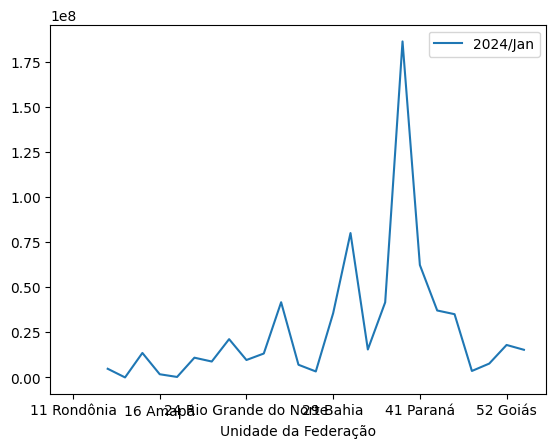

In [17]:
# exibe um gráfico de linhas (padrão) usando as colunas unidade da federação e 2024/Jan
dados.plot(x="Unidade da Federação", y="2024/Jan")

In [18]:
# Importa as bibliotecas necessárias para a criação e formatação de gráficos
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

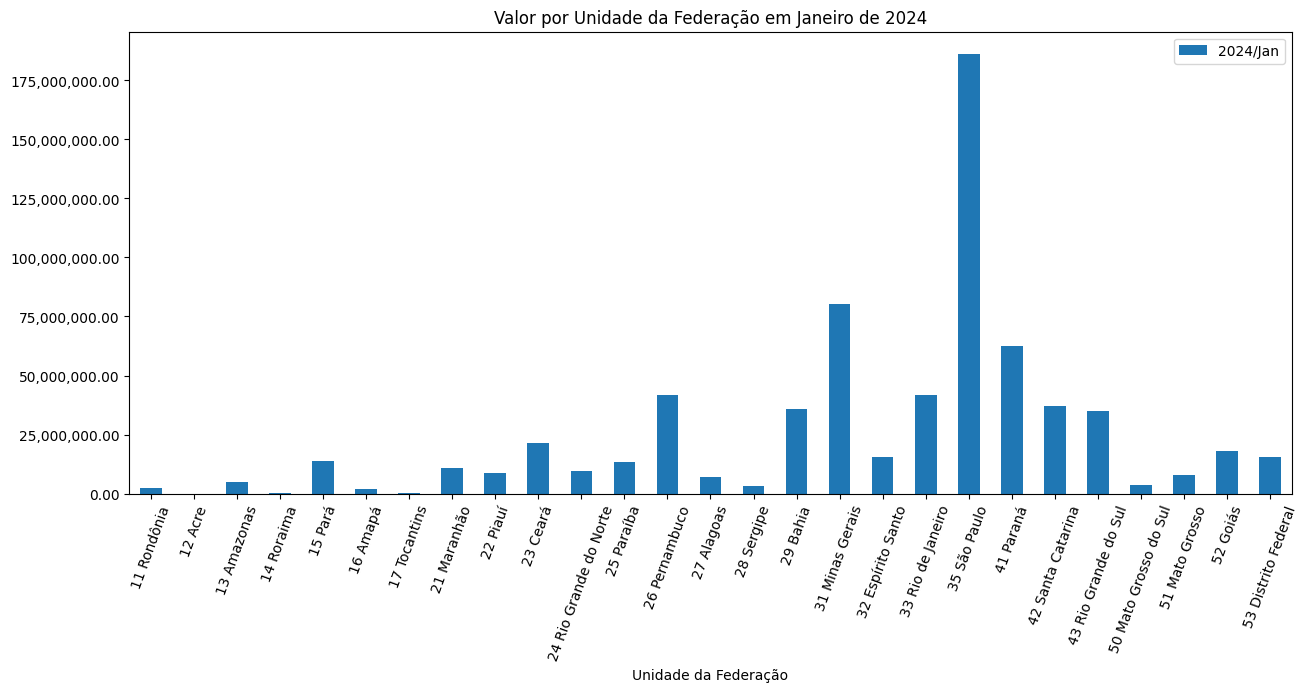

In [19]:
# Cria um gráfico de barras para visualizar os dados de '2024/Jan' por 'Unidade da Federação'.
# Configura o tamanho do gráfico através do parâmetro 'figsize'.
axis = dados.plot(x="Unidade da Federação", y="2024/Jan", kind="bar", figsize=(15,6))

# Configura o formato dos valores do eixo y para incluir separadores de milhar e decimais.
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

# Ajusta os rótulos do eixo x para ficarem em diagonal (45 graus, por exemplo)
#plt.xticks(rotation=70)

# Alternativamente, para uma abordagem mais customizada, você pode usar:
axis.set_xticklabels(axis.get_xticklabels(), rotation=70)

# Define o título do gráfico para melhor contextualização dos dados apresentados.
plt.title("Valor por Unidade da Federação em Janeiro de 2024")

# Exibe o gráfico configurado.
plt.show()

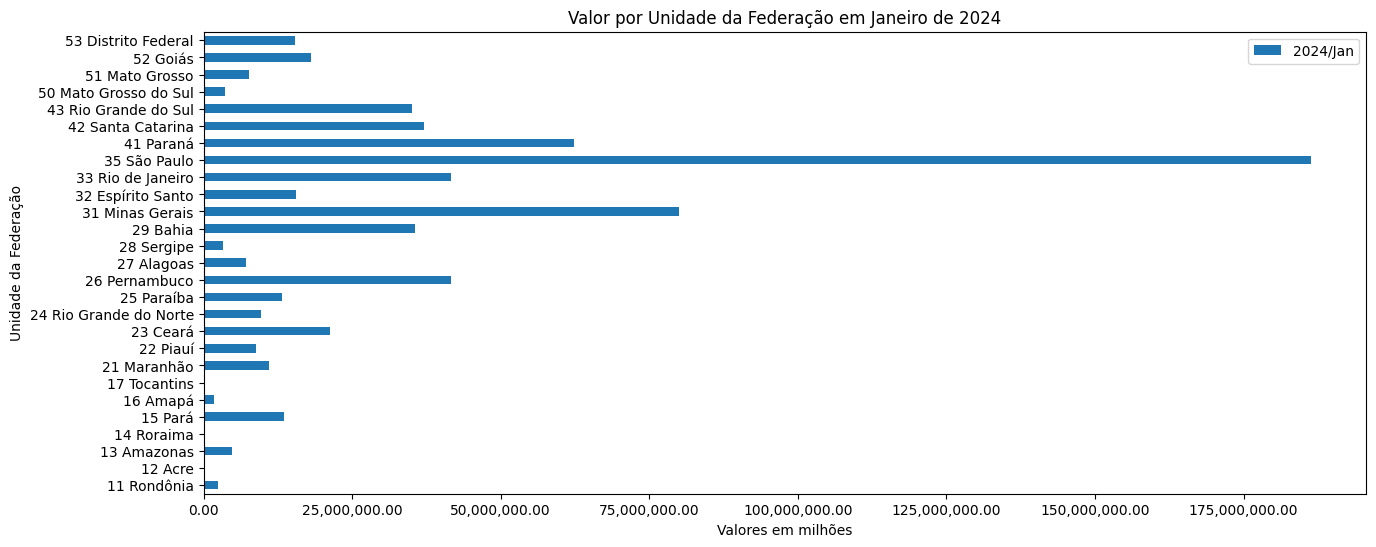

In [28]:
from matplotlib.ticker import FuncFormatter
# Sua função de formatação corrigida
def formatar_em_milhoes(x, pos):
    """Converte o valor 'x' em milhões e retorna como string."""
    return '%1.0f' % (x * 1e-6)

# Cria um gráfico de barras para visualizar os dados de '2024/Jan' por 'Unidade da Federação'.
# Configura o tamanho do gráfico através do parâmetro 'figsize'.
axis = dados.plot(x="Unidade da Federação", y="2024/Jan", kind="barh", figsize=(15,6))

# Configura o formato dos valores do eixo y para incluir separadores de milhar e decimais.
axis.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
#axis.xaxis.set_major_formatter(ticker.FuncFormatter(formatar_em_milhoes))

# Define o título do gráfico para melhor contextualização dos dados apresentados.
plt.title("Valor por Unidade da Federação em Janeiro de 2024")

plt.xlabel("Valores em milhões")

# Exibe o gráfico configurado.
plt.show()

In [21]:
dados[["2008/Ago","2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [22]:
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2023/Mai,2023/Jun,2023/Jul,2023/Ago,2023/Set,2023/Out,2023/Nov,2023/Dez,2024/Jan,Total
0,11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12505974.83,12009682.89,11892438.13,12737928.88,12068445.93,10814659.45,7839878.93,4969181.30,2434117.87,1394262146.50
1,12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4861672.52,5282731.30,4830246.24,4925043.24,4329288.81,4071963.23,3233614.21,1394717.40,NaN,587778407.94
2,13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,22951007.22,22636889.89,22193955.78,21762872.97,16686364.04,17051515.93,14725982.12,11345788.28,4838198.31,2613559191.21
3,14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4915988.80,4097022.28,3814616.24,3180791.10,2362582.36,1585002.57,165184.76,91360.44,41945.05,451170144.15
4,15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52730367.64,49576192.93,49819035.62,52500501.45,51714821.84,51237171.71,49646581.93,32989201.74,13610385.98,6322687933.44


In [29]:
# Exibe as colunas que possuem valores NaN
print(colunas_object)

Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2006/Nov', '2006/Dez', '2007/Jan', '2007/Fev', '2007/Mar', '2007/Abr',
       '2007/Mai', '2007/Jun', '2007/Jul', '2024/Jan'],
      dtype='object', length=123)


In [24]:
# Exibe todas as colunas do dataframe
dados.columns

Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2023/Mai', '2023/Jun', '2023/Jul', '2023/Ago', '2023/Set', '2023/Out',
       '2023/Nov', '2023/Dez', '2024/Jan', 'Total'],
      dtype='object', length=321)

In [38]:
# o método set() converte a lista de colunas em conjunto do Python permitindo operações de conjunto, como União. Interseção e Diferença
# Operação diferença para obter um conjunto de apenas com as colunas que possuem valores float em todas as linhas.
colunas_usaveis = set(dados.columns) - set(colunas_object)

# Exibe o tipo da variável
print(type(colunas_usaveis))

# Exibe as colunas que possuem todos os valores numéricos (float)
colunas_usaveis

<class 'set'>


{'2007/Ago',
 '2007/Dez',
 '2007/Nov',
 '2007/Out',
 '2007/Set',
 '2008/Abr',
 '2008/Ago',
 '2008/Dez',
 '2008/Fev',
 '2008/Jan',
 '2008/Jul',
 '2008/Jun',
 '2008/Mai',
 '2008/Mar',
 '2008/Nov',
 '2008/Out',
 '2008/Set',
 '2009/Abr',
 '2009/Ago',
 '2009/Dez',
 '2009/Fev',
 '2009/Jan',
 '2009/Jul',
 '2009/Jun',
 '2009/Mai',
 '2009/Mar',
 '2009/Nov',
 '2009/Out',
 '2009/Set',
 '2010/Abr',
 '2010/Ago',
 '2010/Dez',
 '2010/Fev',
 '2010/Jan',
 '2010/Jul',
 '2010/Jun',
 '2010/Mai',
 '2010/Mar',
 '2010/Nov',
 '2010/Out',
 '2010/Set',
 '2011/Abr',
 '2011/Ago',
 '2011/Dez',
 '2011/Fev',
 '2011/Jan',
 '2011/Jul',
 '2011/Jun',
 '2011/Mai',
 '2011/Mar',
 '2011/Nov',
 '2011/Out',
 '2011/Set',
 '2012/Abr',
 '2012/Ago',
 '2012/Dez',
 '2012/Fev',
 '2012/Jan',
 '2012/Jul',
 '2012/Jun',
 '2012/Mai',
 '2012/Mar',
 '2012/Nov',
 '2012/Out',
 '2012/Set',
 '2013/Abr',
 '2013/Ago',
 '2013/Dez',
 '2013/Fev',
 '2013/Jan',
 '2013/Jul',
 '2013/Jun',
 '2013/Mai',
 '2013/Mar',
 '2013/Nov',
 '2013/Out',
 '2013/Set',

In [44]:
# Converte o conjunto em uma lista
colunas_usaveis = list(colunas_usaveis)

# Exibe o tipo da variável
print(type(colunas_usaveis))

# Exibe as colunas que possuem todos os valores numéricos (float)
colunas_usaveis

<class 'list'>


['2023/Mai',
 '2014/Nov',
 '2014/Jan',
 '2013/Ago',
 '2015/Out',
 '2016/Nov',
 '2012/Ago',
 '2007/Dez',
 '2019/Out',
 '2017/Dez',
 '2016/Abr',
 '2020/Ago',
 '2014/Jul',
 '2021/Out',
 '2023/Jan',
 '2022/Out',
 '2020/Abr',
 '2018/Ago',
 '2008/Mar',
 '2020/Out',
 '2010/Nov',
 '2010/Jul',
 '2011/Mar',
 '2014/Mai',
 '2009/Set',
 '2015/Fev',
 '2015/Jan',
 '2021/Dez',
 '2013/Fev',
 '2020/Mai',
 '2009/Jan',
 '2020/Set',
 '2019/Mai',
 '2011/Fev',
 '2020/Dez',
 '2008/Jan',
 '2018/Jul',
 '2016/Mar',
 '2023/Dez',
 '2014/Set',
 '2010/Ago',
 '2012/Nov',
 '2022/Fev',
 '2015/Abr',
 '2007/Ago',
 '2013/Set',
 '2011/Dez',
 '2016/Fev',
 '2015/Mai',
 '2019/Mar',
 '2014/Mar',
 '2016/Dez',
 '2012/Jul',
 '2022/Jan',
 '2011/Jan',
 '2022/Mar',
 '2009/Mar',
 '2012/Jun',
 '2015/Jun',
 '2008/Jul',
 '2014/Ago',
 '2016/Out',
 '2014/Abr',
 '2017/Ago',
 '2016/Set',
 '2015/Set',
 '2013/Nov',
 '2020/Jun',
 '2009/Abr',
 '2018/Nov',
 '2020/Jan',
 '2009/Out',
 '2008/Nov',
 '2021/Set',
 '2013/Out',
 '2023/Out',
 '2013/Jan',

In [45]:
# Agora, como colunas_usaveis é uma lista, podemos inserir elementos nela
colunas_usaveis.insert(0, "Unidade da Federação")

In [49]:
colunas_usaveis[:5]

['Unidade da Federação', '2023/Mai', '2014/Nov', '2014/Jan', '2013/Ago']

In [50]:
dados_usuaveis = dados[colunas_usaveis]
dados_usuaveis.head()

,Unidade da Federação,2023/Mai,2014/Nov,2014/Jan,2013/Ago,2015/Out,2016/Nov,2012/Ago,2007/Dez,2019/Out,...,2022/Dez,2010/Jun,2010/Abr,2022/Abr,2009/Nov,2020/Mar,2019/Nov,2018/Abr,2011/Set,2020/Fev
0,11 Rondônia,12505974.83,6965306.56,6349302.00,5889685.39,7654315.58,6964512.59,4315005.38,711758.31,8924348.41,...,10171206.31,4369733.23,4524544.88,9560032.16,3667808.60,7251287.20,8948605.66,8407076.44,4202805.84,8431334.62
1,12 Acre,4861672.52,3191663.93,2880570.12,2895941.14,3177087.64,3082652.71,2801590.13,769612.36,3293378.97,...,3956231.61,2319786.41,2588318.06,3431795.07,2462712.79,2939675.20,3174249.43,2874965.31,2804546.95,2985763.71
2,13 Amazonas,22951007.22,11275532.44,9474986.90,10851212.49,13088040.45,10806653.19,10766405.24,5949408.99,16339427.95,...,18254068.20,9151838.50,9990164.13,18859622.50,8674068.02,14817551.60,14821977.50,14577930.81,9861030.02,15166470.82
3,14 Roraima,4915988.80,1929194.87,1649617.13,1816091.81,2005870.76,2184836.80,1822724.18,470676.43,3162342.44,...,3837710.72,1849065.95,1715762.10,3257248.48,1597811.24,2813954.05,3121104.71,2721261.19,1802450.34,2967159.04
4,15 Pará,52730367.64,29550827.16,29767266.18,28495723.69,29458486.92,30190160.10,25339308.28,13162823.43,36984314.60,...,45055260.27,26947713.85,26949923.37,44812287.59,26784181.74,34908420.50,35579251.49,35039954.20,27122078.56,34683341.17


In [52]:
# Indicando para o Pandas a colunas que desejo usar como índice
dados_usuaveis = dados_usuaveis.set_index("Unidade da Federação")
dados_usuaveis.head()

,2023/Mai,2014/Nov,2014/Jan,2013/Ago,2015/Out,2016/Nov,2012/Ago,2007/Dez,2019/Out,2017/Dez,...,2022/Dez,2010/Jun,2010/Abr,2022/Abr,2009/Nov,2020/Mar,2019/Nov,2018/Abr,2011/Set,2020/Fev
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,12505974.83,6965306.56,6349302.00,5889685.39,7654315.58,6964512.59,4315005.38,711758.31,8924348.41,8159737.49,...,10171206.31,4369733.23,4524544.88,9560032.16,3667808.60,7251287.20,8948605.66,8407076.44,4202805.84,8431334.62
12 Acre,4861672.52,3191663.93,2880570.12,2895941.14,3177087.64,3082652.71,2801590.13,769612.36,3293378.97,2638773.92,...,3956231.61,2319786.41,2588318.06,3431795.07,2462712.79,2939675.20,3174249.43,2874965.31,2804546.95,2985763.71
13 Amazonas,22951007.22,11275532.44,9474986.90,10851212.49,13088040.45,10806653.19,10766405.24,5949408.99,16339427.95,13635186.02,...,18254068.20,9151838.50,9990164.13,18859622.50,8674068.02,14817551.60,14821977.50,14577930.81,9861030.02,15166470.82
14 Roraima,4915988.80,1929194.87,1649617.13,1816091.81,2005870.76,2184836.80,1822724.18,470676.43,3162342.44,2688315.70,...,3837710.72,1849065.95,1715762.10,3257248.48,1597811.24,2813954.05,3121104.71,2721261.19,1802450.34,2967159.04
15 Pará,52730367.64,29550827.16,29767266.18,28495723.69,29458486.92,30190160.10,25339308.28,13162823.43,36984314.60,32067934.67,...,45055260.27,26947713.85,26949923.37,44812287.59,26784181.74,34908420.50,35579251.49,35039954.20,27122078.56,34683341.17


In [54]:
dados_usuaveis["2007/Ago"].head()

Unidade da Federação
11 Rondônia     4209.37
12 Acre        10470.07
13 Amazonas    35752.72
14 Roraima      4785.91
15 Pará       181159.29
Name: 2007/Ago, dtype: float64

In [56]:
# Podemos localizar um elemento pelo índice (pela chave) usando o método loc
dados_usuaveis.loc["12 Acre"]

2023/Mai   4861672.52
2014/Nov   3191663.93
2014/Jan   2880570.12
2013/Ago   2895941.14
2015/Out   3177087.64
              ...    
2020/Mar   2939675.20
2019/Nov   3174249.43
2018/Abr   2874965.31
2011/Set   2804546.95
2020/Fev   2985763.71
Name: 12 Acre, Length: 198, dtype: float64

In [57]:
# Podemos localizar um elemento pelo contador i usando o método iloc
dados_usuaveis.iloc[1]

2023/Mai   4861672.52
2014/Nov   3191663.93
2014/Jan   2880570.12
2013/Ago   2895941.14
2015/Out   3177087.64
              ...    
2020/Mar   2939675.20
2019/Nov   3174249.43
2018/Abr   2874965.31
2011/Set   2804546.95
2020/Fev   2985763.71
Name: 12 Acre, Length: 198, dtype: float64

<Axes: xlabel='Unidade da Federação'>

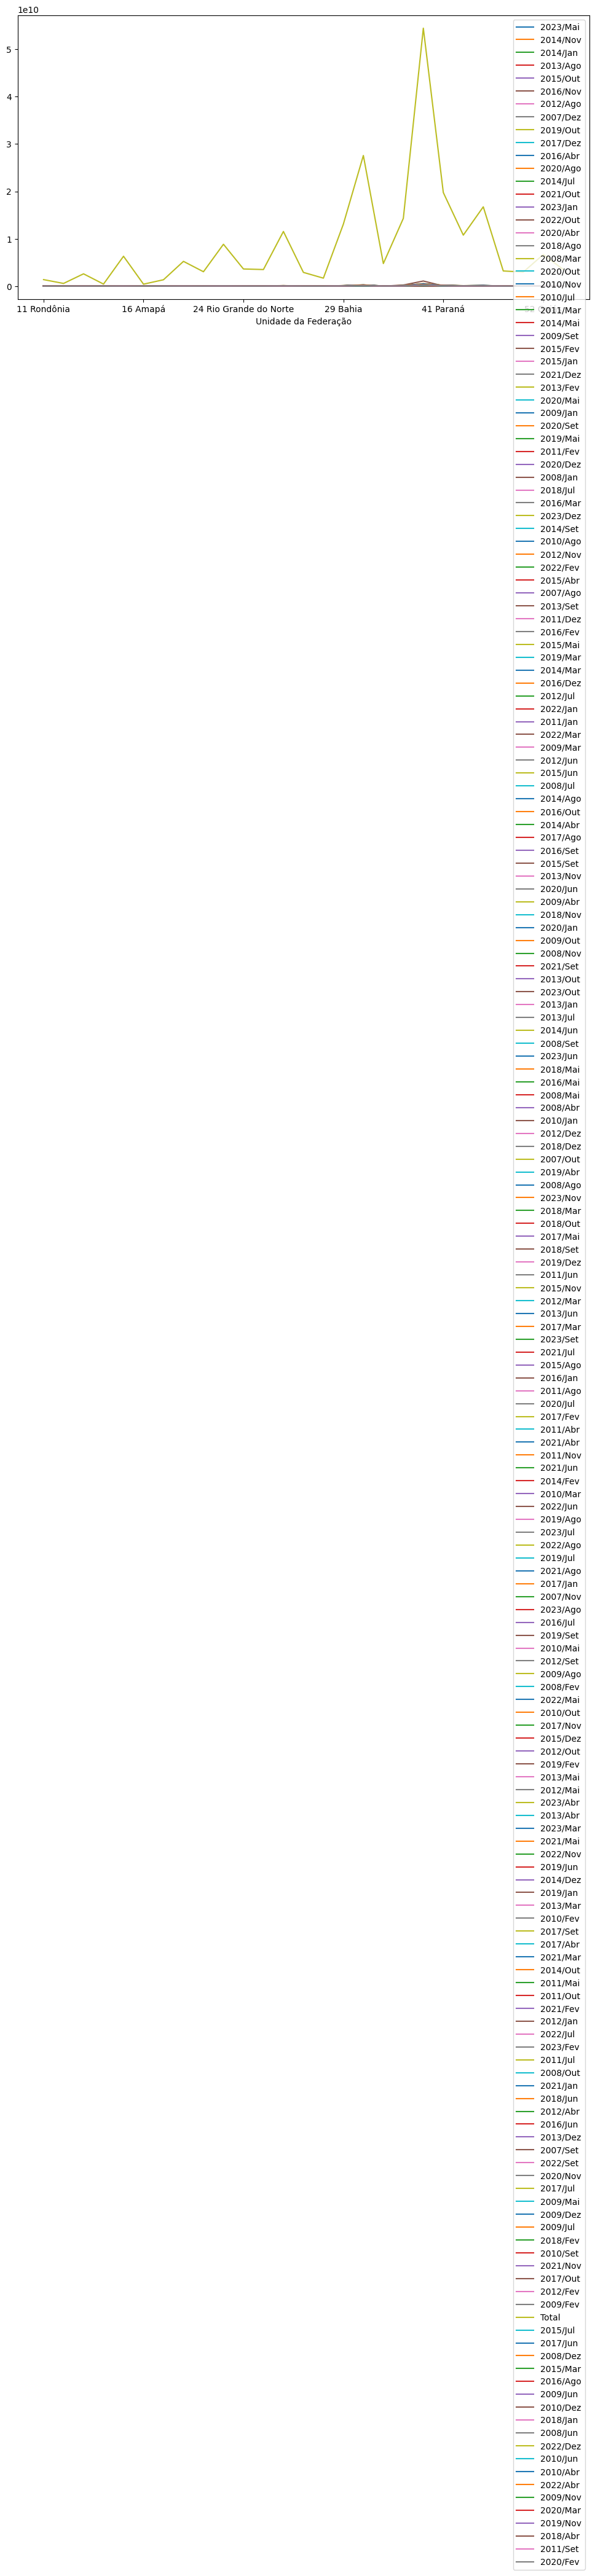

In [58]:
dados_usuaveis.plot(figsize=(12,6))

In [59]:
# Podemos usar o método T para transpor os dados do dataframe (matriz)
# O que coluna vira linha e o que era linha vira coluna
dados_usuaveis.T.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2023/Mai,12505974.83,4861672.52,22951007.22,4915988.80,52730367.64,5779164.49,9839564.73,42107180.54,24290899.80,68367984.61,...,43179230.48,124710154.00,386515192.31,155962309.38,92358687.52,119911799.35,27012124.81,24470787.76,50134061.74,29919839.16
2014/Nov,6965306.56,3191663.93,11275532.44,1929194.87,29550827.16,1546358.63,6957903.45,24976037.03,13865890.04,41205055.49,...,21389486.83,60439022.21,256619009.71,87565870.66,50806457.54,86546826.85,14624058.44,13680626.69,34439428.40,14020609.04
2014/Jan,6349302.00,2880570.12,9474986.90,1649617.13,29767266.18,2175830.82,7145654.90,25507397.81,14073144.03,43406080.99,...,19447016.21,67149544.91,270959329.45,85535913.11,48166313.29,83655725.66,14476457.54,13117006.00,31991601.57,15347265.06
2013/Ago,5889685.39,2895941.14,10851212.49,1816091.81,28495723.69,2030265.74,7282719.70,24690945.46,14091252.29,42525459.89,...,20876552.66,61686544.68,266173567.00,92866583.49,50202084.87,84526389.95,14317099.43,13552226.24,32848134.94,17207426.40
2015/Out,7654315.58,3177087.64,13088040.45,2005870.76,29458486.92,1852746.03,6409616.56,26479823.13,14778012.73,45894923.72,...,23697420.39,68378282.65,266234595.96,98263485.47,55685228.09,87834001.13,15402132.94,14840947.44,35272066.20,14370562.76


<Axes: >

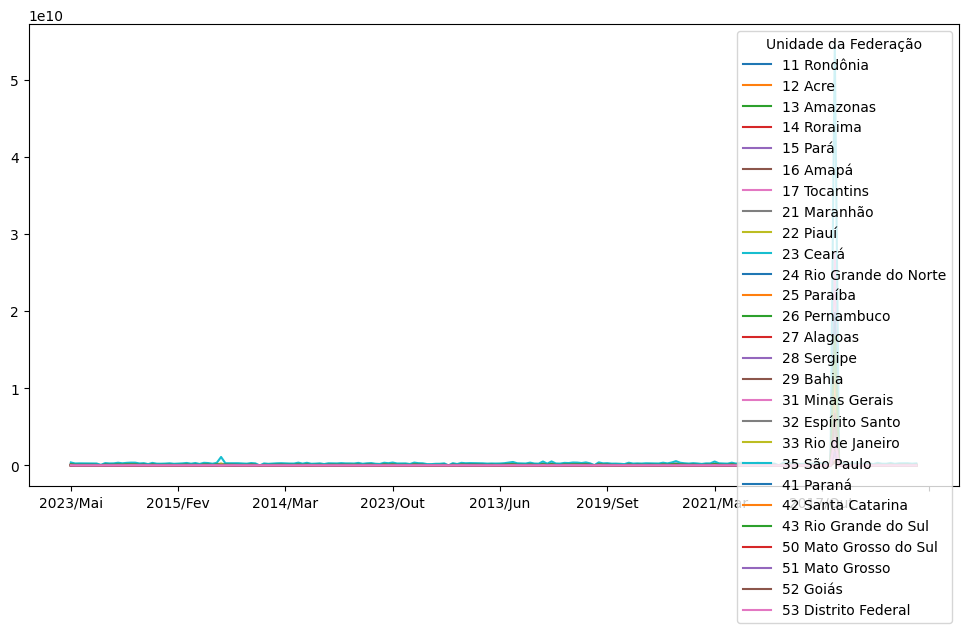

In [61]:
dados_usuaveis.T.plot(figsize=(12,6))

In [63]:
# O total está sendo apresentado
dados_usuaveis["Total"]

Unidade da Federação
11 Rondônia               1394262146.50
12 Acre                    587778407.94
13 Amazonas               2613559191.21
14 Roraima                 451170144.15
15 Pará                   6322687933.44
16 Amapá                   434057663.03
17 Tocantins              1364198743.40
21 Maranhão               5245996055.35
22 Piauí                  3055504906.18
23 Ceará                  8854791965.38
24 Rio Grande do Norte    3639512926.05
25 Paraíba                3520456040.98
26 Pernambuco            11552242820.69
27 Alagoas                2917322193.59
28 Sergipe                1702812778.16
29 Bahia                 13106353081.84
31 Minas Gerais          27581694491.94
32 Espírito Santo         4784325123.75
33 Rio de Janeiro        14318869113.09
35 São Paulo             54440115497.18
41 Paraná                19763419297.81
42 Santa Catarina        10780033131.67
43 Rio Grande do Sul     16750147966.65
50 Mato Grosso do Sul     3219624366.70
51 Mato Grosso     

In [67]:
# Exclui a colunas Total
dados_usuaveis = dados_usuaveis.drop("Total", axis=1)

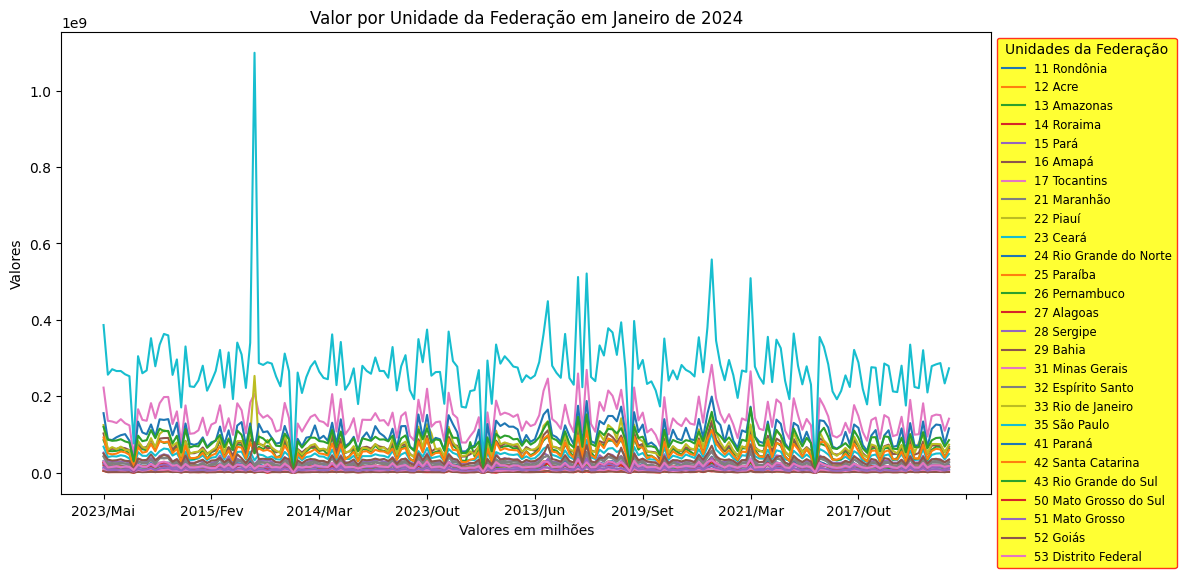

In [80]:
# Desafio: Reposicionar a legenda
# Desafio1: Colocar títulos nos dois eixos
# Desafio2: Retocar visualização da legenda

dados_usuaveis.T.plot(figsize=(12,6))


plt.legend(title='Unidades da Federação', 
           fontsize='small', 
           loc="upper left", 
           bbox_to_anchor=(1,1), 
           frameon=True, 
           edgecolor='red', 
           facecolor='yellow')

# Define o título do gráfico para melhor contextualização dos dados apresentados.
plt.title("Valor por Unidade da Federação em Janeiro de 2024")

plt.xlabel("Valores em milhões")

plt.ylabel("Valores")

# Exibe o gráfico configurado.
plt.show()